# Demand - Capacities - Investment and Emissions Categories AR6 IPCC

The purpose of this file is to plot the data of the IPCC assessed scenarios 

AR6 Dataset

Source:
https://data.ene.iiasa.ac.at/ar6/#/login

Work is done on the data **"demand_emissions_cat_merged_24August2022.csv"**



Date **24 August 2022**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
demand = pd.read_csv('AR6_Scenarios_Database_World_v1.0_selected_excel.csv')

emissions_cat = pd.read_excel('merging_categories_emissions.xlsx')


In [23]:
demand.head()

,Model,Scenario,Region,Variable,Unit,2000,2010,2020,2021,2040,2050,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,NaN,NaN,392.249362,360.368309,135.139281,107.634545,133.587200
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,NaN,NaN,41875.996010,39261.052720,3597.338938,-2121.743123,-9471.112148
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,NaN,NaN,1473.847279,1355.234709,163.083745,147.381708,164.979770
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,NaN,58.8100,59.796600,NaN,962.315200,1608.865900,3317.977200
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,NaN,1516.7495,1889.504200,NaN,155.257600,153.763200,480.515000


In [24]:
emissions_cat.head()

,Model,Scenario,Category,Category_name
0,AIM/CGE 2.0,SSP1-26,C3,C3: limit warming to 2°C (>67%)
1,AIM/CGE 2.0,SSP1-34,C5,C5: limit warming to 2.5°C (>50%)
2,AIM/CGE 2.0,SSP1-45,C6,C6: limit warming to 3°C (>50%)
3,AIM/CGE 2.0,SSP1-Baseline,C7,C7: limit warming to 4°C (>50%)
4,AIM/CGE 2.0,SSP4-26,C3,C3: limit warming to 2°C (>67%)


In [25]:
result = pd.merge(demand, emissions_cat, how="left", on=["Model", "Scenario"])

In [26]:
result.head()

,Model,Scenario,Region,Variable,Unit,2000,2010,2020,2021,2040,2050,2100,Category,Category_name
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,NaN,NaN,392.249362,360.368309,135.139281,107.634545,133.587200,NaN,NaN
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,NaN,NaN,41875.996010,39261.052720,3597.338938,-2121.743123,-9471.112148,NaN,NaN
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,NaN,NaN,1473.847279,1355.234709,163.083745,147.381708,164.979770,NaN,NaN
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,NaN,58.8100,59.796600,NaN,962.315200,1608.865900,3317.977200,NaN,NaN
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,NaN,1516.7495,1889.504200,NaN,155.257600,153.763200,480.515000,NaN,NaN


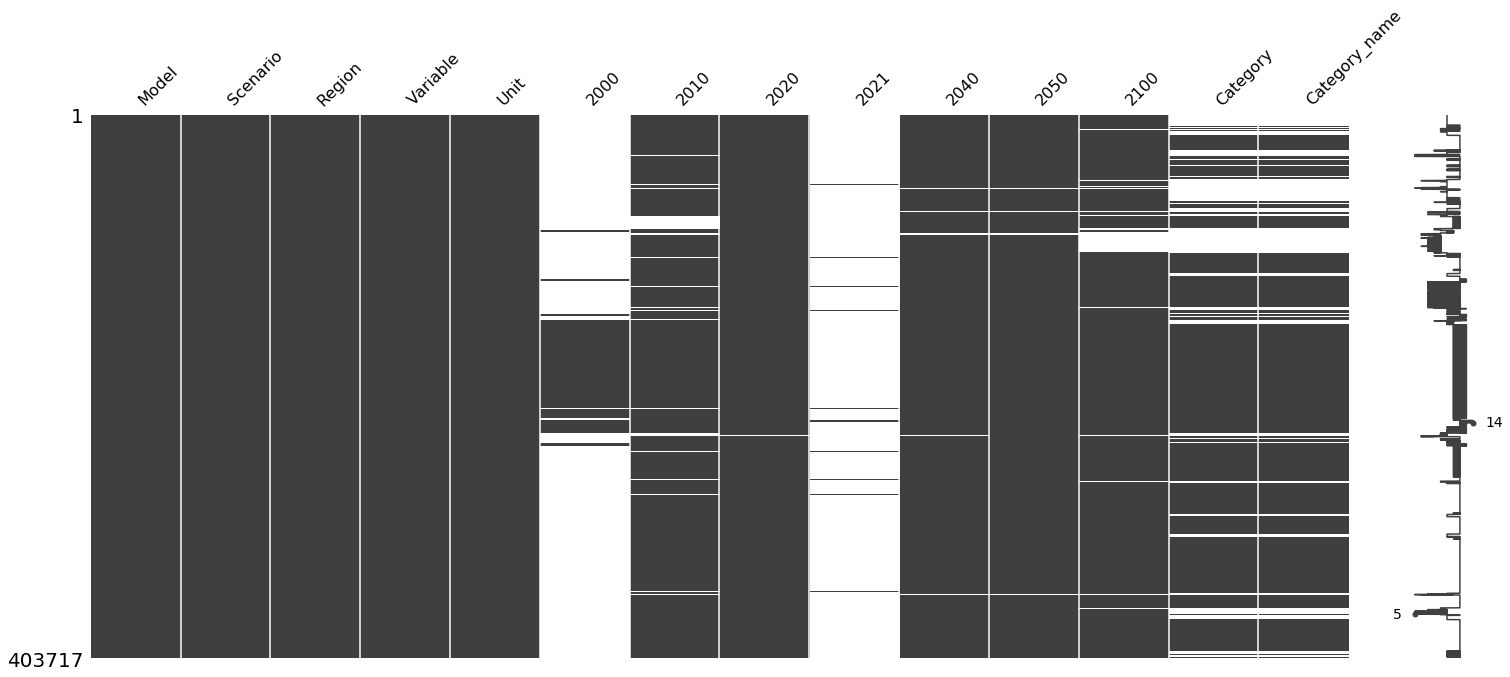

In [27]:
import missingno as msno
msno.matrix(result)

In [35]:
# clean the result dataframe by dropping columns with many empty cells

result_c = result.drop(columns=['2021','2000', '2100', '2010', 'Category_name' ])

In [36]:
result_c.head()

,Model,Scenario,Region,Variable,Unit,2020,2040,2050,Category
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,392.249362,135.139281,107.634545,NaN
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,41875.996010,3597.338938,-2121.743123,NaN
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,1473.847279,163.083745,147.381708,NaN
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Biomass,GW,59.796600,962.315200,1608.865900,NaN
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,World,Capacity|Electricity|Coal,GW,1889.504200,155.257600,153.763200,NaN


In [37]:
# check the number of empty values 
result_c.isnull().sum()

Model           0
Scenario        0
Region          0
Variable        0
Unit            0
2020         1786
2040         3762
2050         3286
Category    89087
dtype: int64

In [39]:
# dropna
results_clean = result_c.dropna()

In [41]:
results_clean.shape

(314519, 9)

In [42]:
results_clean.to_csv('demand_capacity_investment_emissionscategory.csv')

## Work on the merged dataset to get insights on
* the investment cost of each category
* the carbon price level 
* the demand of each fuel 

In [43]:
#read the dataframe 
ipcc = pd.read_csv('demand_capacity_investment_emissionscategory.csv')

In [44]:
ipcc.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2020,2040,2050,Category
0,7796,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Infilled|Emissions|CH4,Mt CH4/yr,380.730719,172.269750,151.312704,C3
1,7797,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Infilled|Emissions|CO2,Mt CO2/yr,37462.666750,18913.013820,12965.258480,C3
2,7798,AIM/CGE 2.0,SSP1-26,World,AR6 climate diagnostics|Infilled|Emissions|F-G...,Mt CO2/yr,1165.674969,164.514689,156.029909,C3
3,7799,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity,GW,5580.912600,13040.391200,17146.232300,C3
4,7800,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity|Biomass,GW,68.433100,290.814800,574.511600,C3


In [45]:
ipcc['Region'].value_counts()

World    314519
Name: Region, dtype: int64

The data has information on the world only - no regional analysis 

In [59]:
ipcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314519 entries, 0 to 314518
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  314519 non-null  int64  
 1   Model       314519 non-null  object 
 2   Scenario    314519 non-null  object 
 3   Region      314519 non-null  object 
 4   Variable    314519 non-null  object 
 5   Unit        314519 non-null  object 
 6   2020        314519 non-null  float64
 7   2040        314519 non-null  float64
 8   2050        314519 non-null  float64
 9   Category    314519 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 24.0+ MB


In [60]:
ipcc.columns

Index(['Unnamed: 0', 'Model', 'Scenario', 'Region', 'Variable', 'Unit', '2020',
       '2040', '2050', 'Category'],
      dtype='object')

In [61]:
ipcc.shape

(314519, 10)

In [62]:
# count the number of scenarios 

ipcc.Model.nunique()

44

In [63]:
ipcc.Variable.unique()

array(['AR6 climate diagnostics|Infilled|Emissions|CH4',
       'AR6 climate diagnostics|Infilled|Emissions|CO2',
       'AR6 climate diagnostics|Infilled|Emissions|F-Gases',
       'Capacity|Electricity', 'Capacity|Electricity|Biomass',
       'Capacity|Electricity|Coal', 'Capacity|Electricity|Fossil',
       'Capacity|Electricity|Gas', 'Capacity|Electricity|Geothermal',
       'Capacity|Electricity|Hydro',
       'Capacity|Electricity|Non-Biomass Renewables',
       'Capacity|Electricity|Nuclear', 'Capacity|Electricity|Oil',
       'Capacity|Electricity|Renewables (incl. Biomass)',
       'Capacity|Electricity|Solar', 'Capacity|Electricity|Wind',
       'Carbon Sequestration|CCS', 'Carbon Sequestration|CCS|Biomass',
       'Carbon Sequestration|CCS|Fossil', 'Carbon Sequestration|Land Use',
       'Carbon Sequestration|Land Use|Afforestation', 'Consumption',
       'Emissions|CH4', 'Emissions|CH4|AFOLU', 'Emissions|CH4|Energy',
       'Emissions|CO2', 'Emissions|CO2|AFOLU',
       'Em

In [74]:
# excluse category 5 to 8
ipcc = ipcc[ipcc['Category'].isin(['C1', 'C2', 'C3', 'C4'])]

In [79]:
# get a list of energy variables 

energy_variables = ['Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [103]:
investment = ['Investment|Energy Supply|Electricity|Biomass|w/ CCS',
       'Investment|Energy Supply|Electricity|Biomass|w/o CCS',
       'Investment|Energy Supply|Electricity|Coal|w/ CCS',
       'Investment|Energy Supply|Electricity|Coal|w/o CCS',
       'Investment|Energy Supply|Electricity|Gas|w/ CCS',
       'Investment|Energy Supply|Electricity|Gas|w/o CCS',
       'Investment|Energy Supply|Electricity|Geothermal',
       'Investment|Energy Supply|Electricity|Hydro',
       'Investment|Energy Supply|Electricity|Non-Biomass Renewables',
       'Investment|Energy Supply|Electricity|Nuclear',
       'Investment|Energy Supply|Electricity|Oil|w/o CCS',
       'Investment|Energy Supply|Electricity|Renewables (incl. Biomass)',
       'Investment|Energy Supply|Electricity|Solar',
       'Investment|Energy Supply|Electricity|Transmission and Distribution',
       'Investment|Energy Supply|Electricity|Wind',
       'Investment|Energy Supply|Extraction|Fossil',
       'Investment|Energy Supply|Hydrogen|Fossil',
       'Investment|Energy Supply|Hydrogen|Other']

# excluded the investment in 'Investment|Energy Efficiency', 'Investment|Energy Supply' as they show very high values that distort the chart 

In [65]:
ccs = ['Carbon Sequestration|CCS|Biomass|Energy|Supply',
       'Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity',
       'Carbon Sequestration|CCS|Biomass|Energy|Supply|Liquids',
       'Carbon Sequestration|CCS|Fossil|Energy|Demand|Industry',
       'Carbon Sequestration|CCS|Fossil|Energy|Supply',
       'Carbon Sequestration|CCS|Fossil|Energy|Supply|Electricity',
       'Carbon Sequestration|CCS|Fossil|Energy|Supply|Liquids',
       'Carbon Sequestration|CCS|Industrial Processes']

In [66]:
capacity = ['Capacity|Electricity', 'Capacity|Electricity|Biomass',
       'Capacity|Electricity|Coal', 'Capacity|Electricity|Fossil',
       'Capacity|Electricity|Gas', 'Capacity|Electricity|Geothermal',
       'Capacity|Electricity|Hydro',
       'Capacity|Electricity|Non-Biomass Renewables',
       'Capacity|Electricity|Nuclear', 'Capacity|Electricity|Oil',
       'Capacity|Electricity|Renewables (incl. Biomass)',
       'Capacity|Electricity|Solar', 'Capacity|Electricity|Wind']

In [117]:
ipcc_PD = ipcc[ipcc['Variable'].isin(energy_variables)]
ipcc_cap = ipcc[ipcc['Variable'].isin(capacity)]
ipcc_ccs = ipcc[ipcc['Variable'].isin(ccs)]
ipcc_inv = ipcc[ipcc['Variable'].isin(investment)]

In [85]:
ipcc_PD.Unit.value_counts()

EJ/yr    4586
Name: Unit, dtype: int64

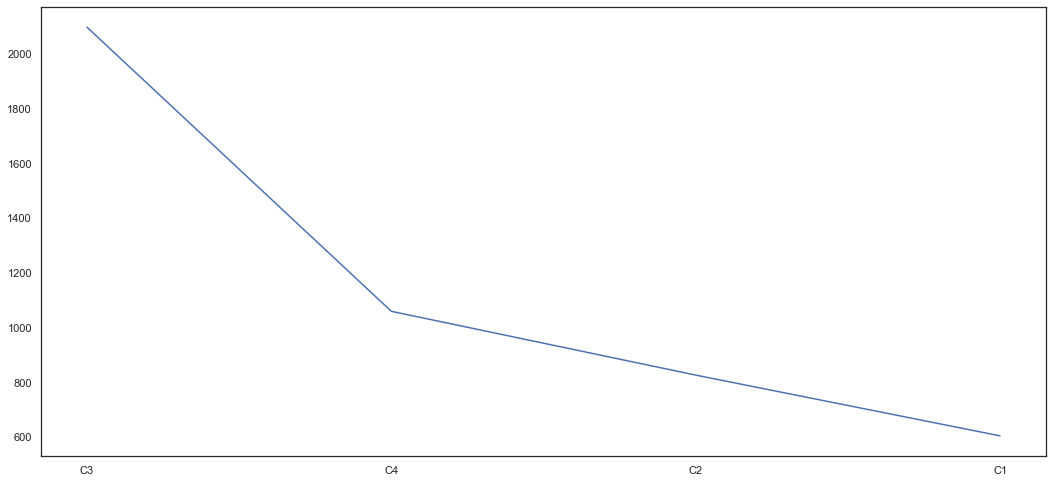

In [95]:
ipcc_PD.Category.value_counts().plot()

## Plotting the outcome of energy scenarioes

###  Q1] How is the distribution of primary energy demand in each category?

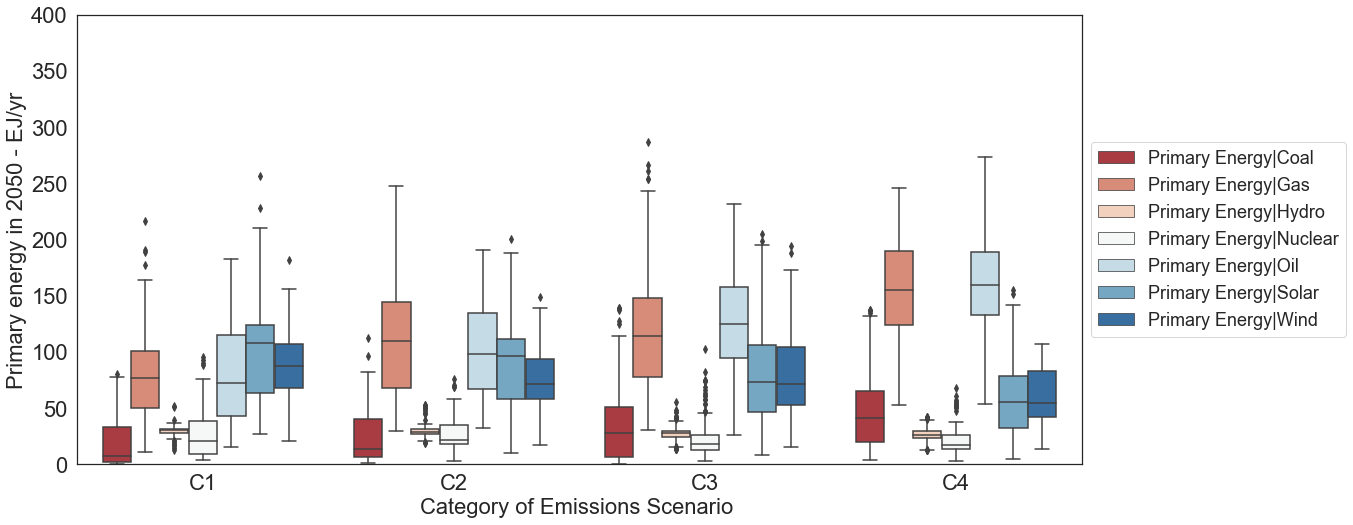

In [98]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(18,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Category', y='2050', data=ipcc_PD, hue = "Variable", palette='RdBu', order=['C1','C2','C3','C4'])
plt.ylabel('Primary energy in 2050 - EJ/yr', size = 22)
plt.yticks(size = 22)
plt.yticks(size = 22)
plt.ylim(0,400)

plt.xlabel('Category of Emissions Scenario ', size = 22)
plt.xticks(size = 22);
plt.legend(prop={'size': 18}, loc='center left', bbox_to_anchor=(1, 0.5))



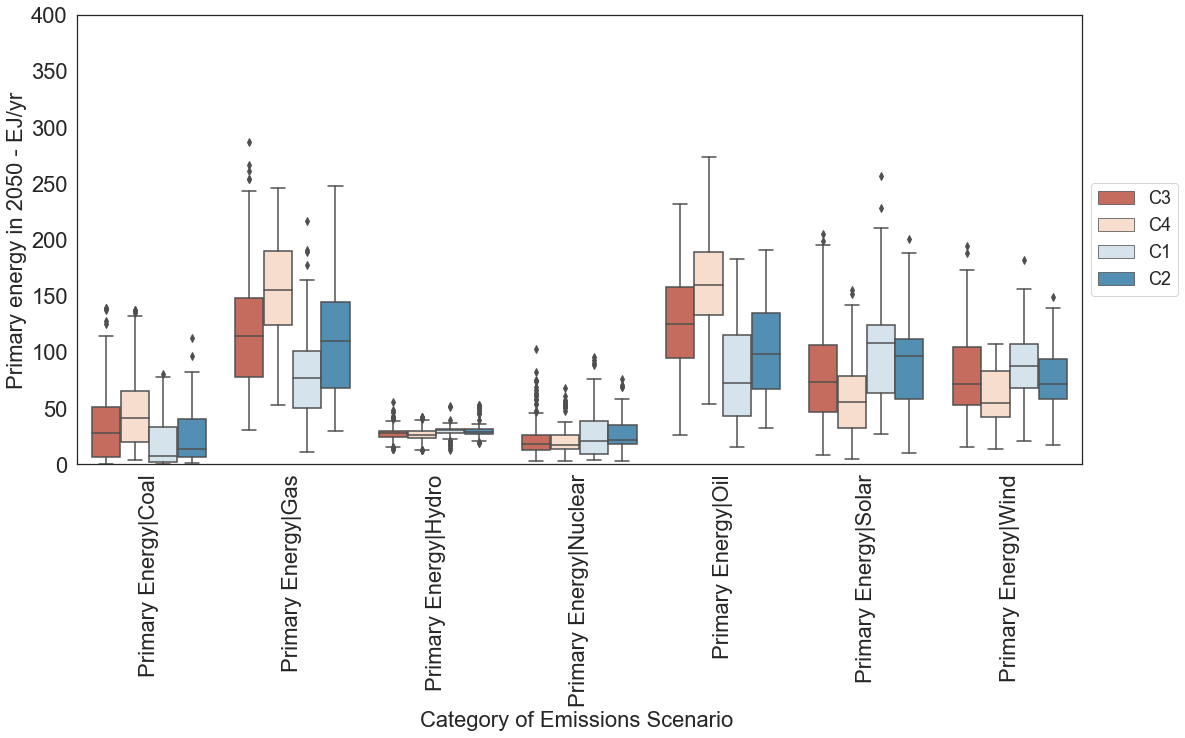

In [156]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(18,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Variable', y='2050', data=ipcc_PD, hue = "Category", palette='RdBu')
plt.ylabel('Primary energy in 2050 - EJ/yr', size = 22)
plt.yticks(size = 22)
plt.yticks(size = 22)
plt.ylim(0,400)

plt.xlabel('Category of Emissions Scenario ', size = 22)
plt.xticks(size = 22, rotation = 90);
plt.legend(prop={'size': 18}, loc='center left', bbox_to_anchor=(1, 0.5))

###  Q2] How is the distribution of ivestment in each category?

In [118]:
# cut the size of wording 
# ipcc_inv['Variable'] = ipcc_inv['Variable'].apply(lambda x:x[37:])

In [119]:
ipcc_inv.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2020,2040,2050,Category
1133,10487,AIM/CGE 2.1,CD-LINKS_NPi2020_1000,World,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,0.000000,48.885455,57.744510,C3
1134,10488,AIM/CGE 2.1,CD-LINKS_NPi2020_1000,World,Investment|Energy Supply|Electricity|Biomass|w...,billion US$2010/yr,8.768551,120.954238,357.622204,C3
1135,10489,AIM/CGE 2.1,CD-LINKS_NPi2020_1000,World,Investment|Energy Supply|Electricity|Coal|w/ CCS,billion US$2010/yr,0.000000,21.012740,26.197648,C3
1136,10490,AIM/CGE 2.1,CD-LINKS_NPi2020_1000,World,Investment|Energy Supply|Electricity|Coal|w/o CCS,billion US$2010/yr,72.368295,11.433457,19.628485,C3
1137,10491,AIM/CGE 2.1,CD-LINKS_NPi2020_1000,World,Investment|Energy Supply|Electricity|Gas|w/ CCS,billion US$2010/yr,0.000000,68.148526,66.381355,C3


In [126]:
ipcc_inv.Unit.value_counts()

billion US$2010/yr    7514
Name: Unit, dtype: int64

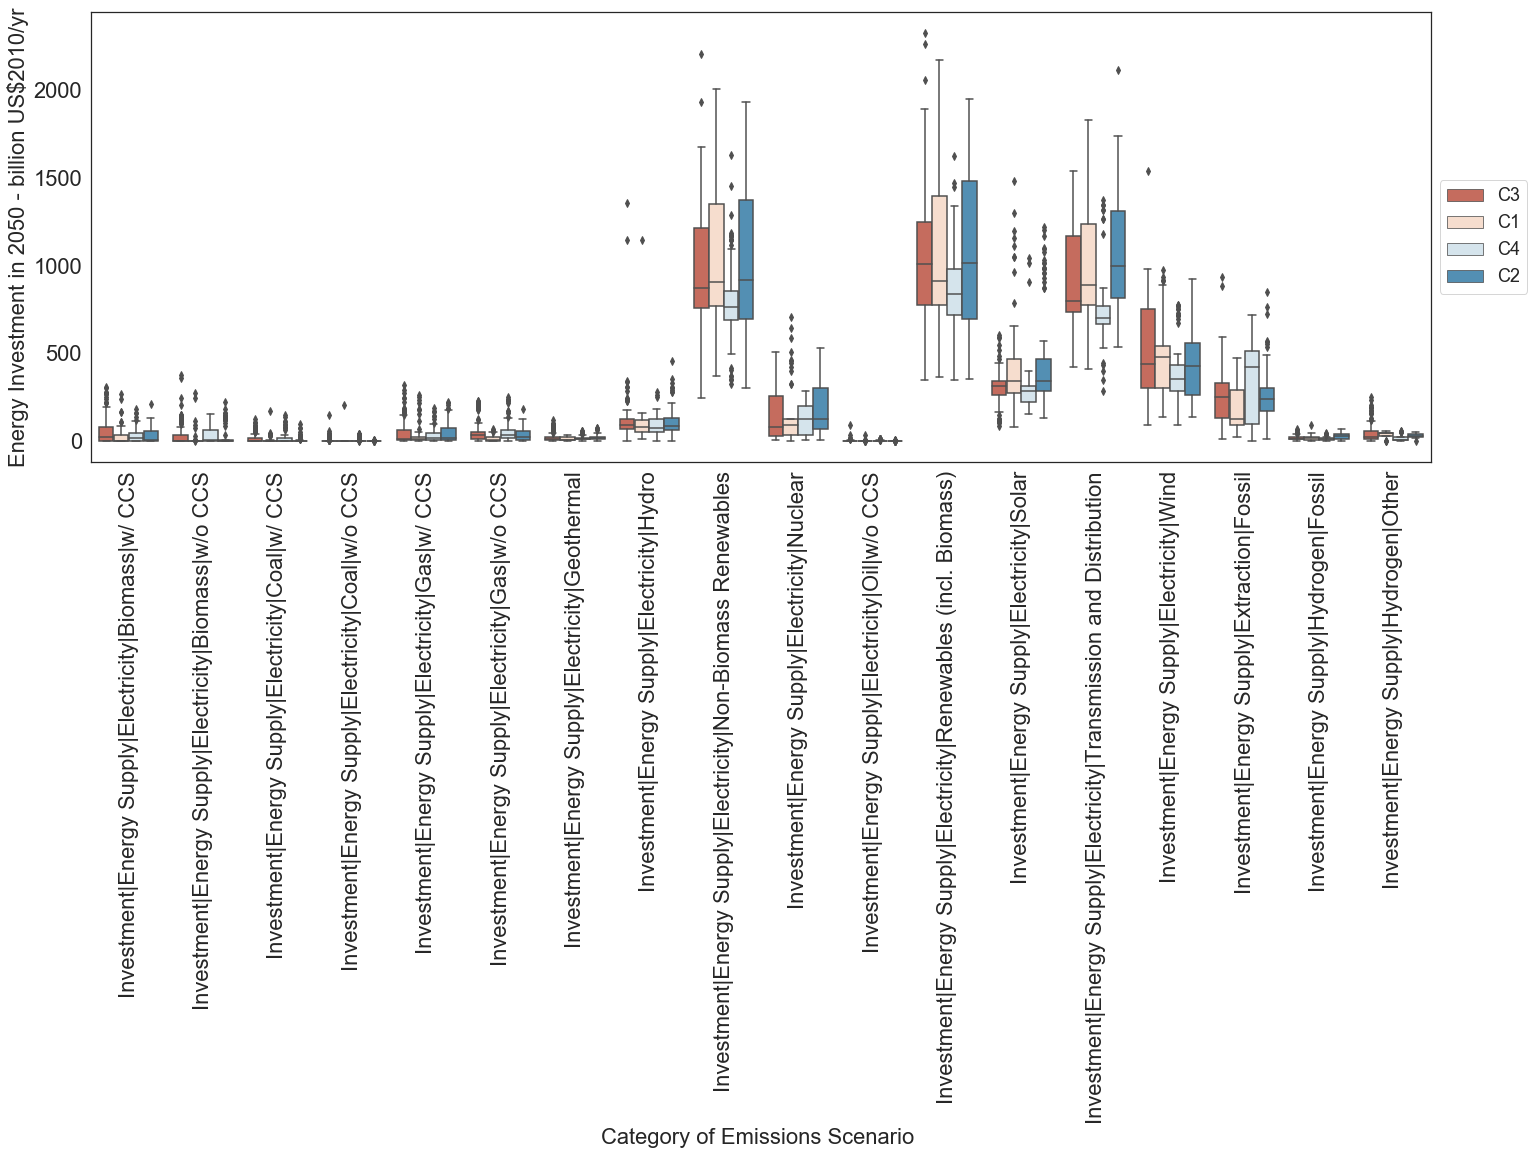

In [152]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(24,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Variable', y='2050', data=ipcc_inv, hue = "Category", palette='RdBu')
plt.ylabel('Energy Investment in 2050 - billion US$2010/yr', size = 22)
plt.yticks(size = 22)
plt.yticks(size = 22)
plt.ylim()

plt.xlabel('Category of Emissions Scenario ', size = 22)
plt.xticks(size = 22, rotation = 90);
plt.legend(prop={'size': 18}, loc='center left', bbox_to_anchor=(1, 0.5))



###  Q3] How is the distribution of power capacity in each category?

In [129]:
ipcc_cap.head()

,Unnamed: 0,Model,Scenario,Region,Variable,Unit,2020,2040,2050,Category
3,7799,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity,GW,5580.9126,13040.3912,17146.2323,C3
4,7800,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity|Biomass,GW,68.4331,290.8148,574.5116,C3
5,7801,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity|Coal,GW,1945.6676,925.1284,854.8340,C3
6,7802,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity|Fossil,GW,3127.9870,1982.1717,1759.9175,C3
7,7803,AIM/CGE 2.0,SSP1-26,World,Capacity|Electricity|Gas,GW,893.9813,782.8958,667.6744,C3


In [130]:
ipcc_cap.Unit.value_counts()

GW    7147
Name: Unit, dtype: int64

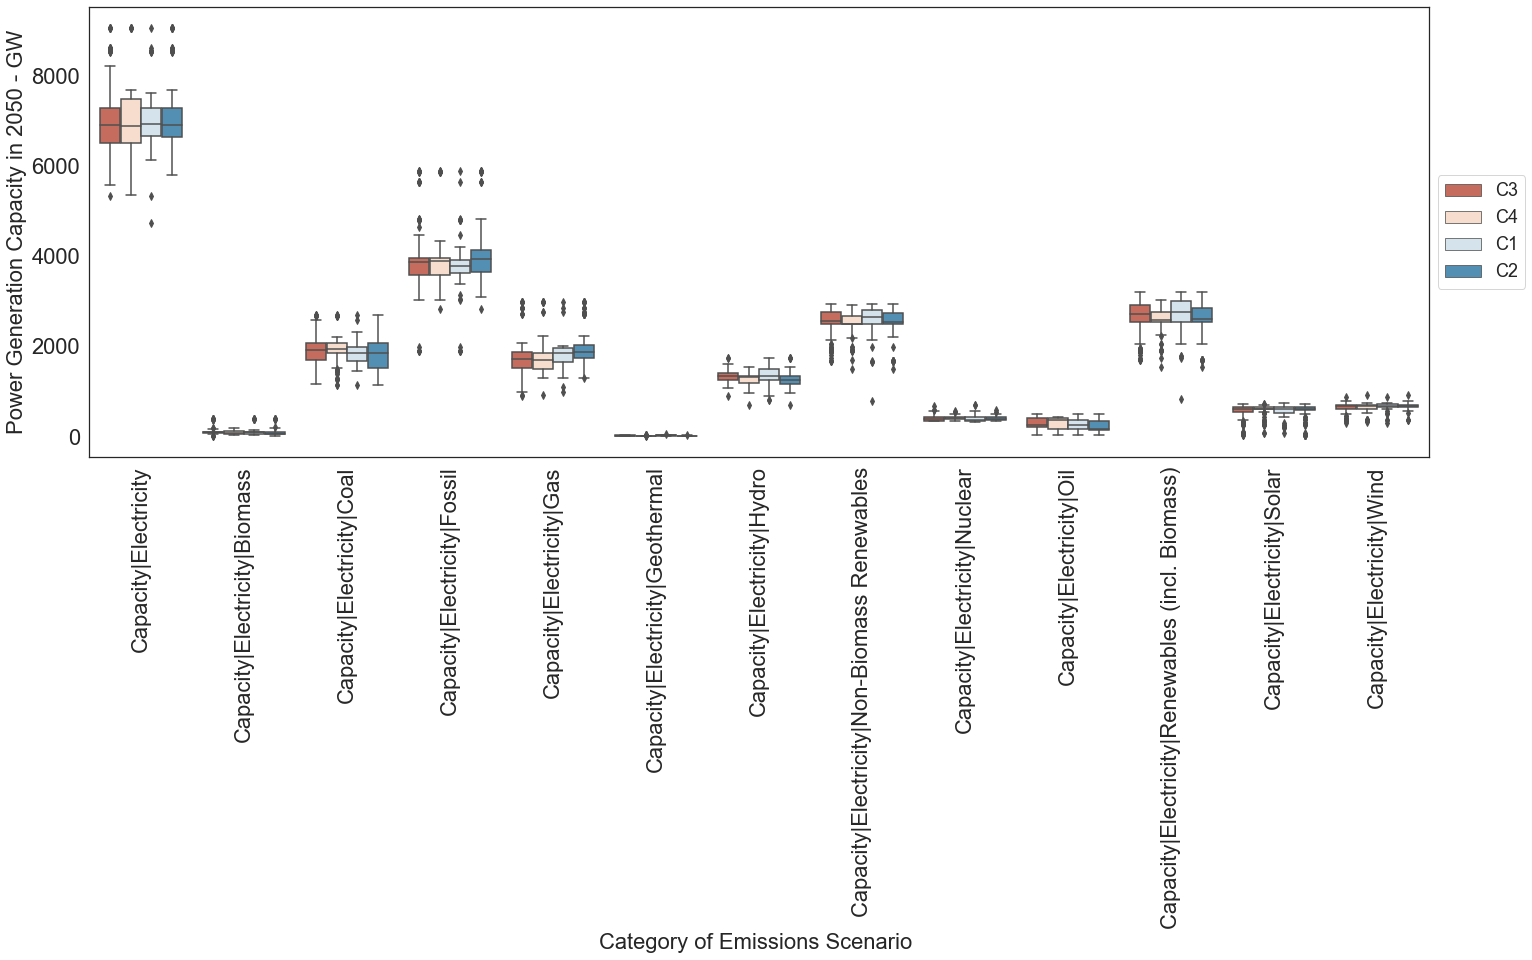

In [142]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(24,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Variable', y='2020', data=ipcc_cap, hue = "Category", palette='RdBu')
plt.ylabel('Power Generation Capacity in 2050 - GW', size = 22)
plt.yticks(size = 22)
plt.yticks(size = 22)
plt.ylim()

plt.xlabel('Category of Emissions Scenario ', size = 22)
plt.xticks(size = 22, rotation = 90);
plt.legend(prop={'size': 18}, loc='center left', bbox_to_anchor=(1, 0.5))



### Next work - convert the dataframe into long formate